# Simulation Creation: Day 2
This contains a target for students to achieve for day 2. The laser is gauss distributed and diffusion is accounted for. Things can be changed to adapt for each students needs. The animation can be viewed during calculations or after in GIF form. (Both can be done with one code but for simplicity we should ask studets to choose one method.)
## Equations Used:
**The Temperature of a Mesh Node After Diffusion Occurs:**
<p style="text-align: center;">$T_{i,j}^{t} = [\frac{1}{1+2\alpha{dt(\frac{1}{dx^2}+\frac{1}{dy^2})}}]\cdot[T_{i,j}^{t-1} + (\alpha{dt})(\frac{T_{i-1,j}^{t}+T_{i+1,j}^{t}}{dx^2}+\frac{T_{i,j-1}^{t}+T_{i,j+1}^{t}}{dy^2})]$</p>

**The Temperature of a Mesh Node After Being Heated by a Gaussian Distributed Laser:** 
<p style="text-align: center;">$T_n(x,y) = T_0(x,y) + \frac{q\cdot{dt}}{\rho{c_p}\pi\cdot(4\pi\alpha\cdot{dt})^{\frac{1}{2}}}\cdot\frac{1}{4\alpha\cdot{dt}+2\sigma^{2}}\cdot{e^{(-\frac{(x-x')^2+(y-y')^2}{2\sigma^2+4\alpha\cdot{dt}})}}$</p>

# No-Wait Simulation: (No GIF)

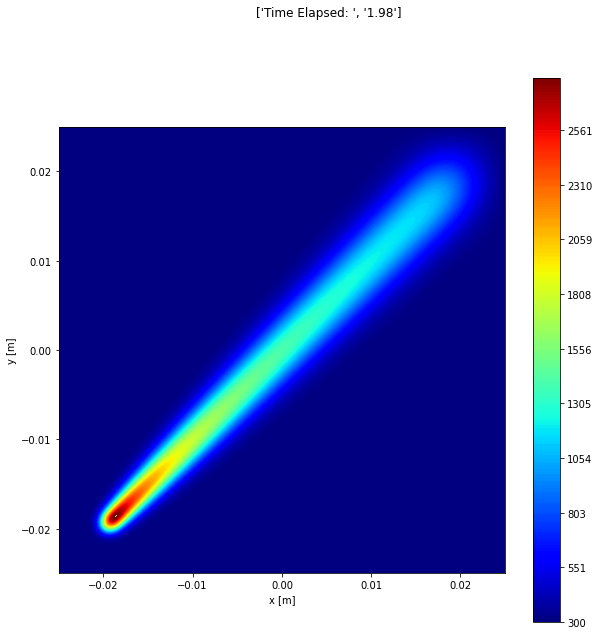

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython import display
import time
#################################################################################
# Input parameters:

# Plate Initialization:
x_length = 50/1000;               # [mm]-->[m]
y_length = 50/1000;               # [mm]-->[m]
nx = 200;                         # number of grid points
ny = 200;                         # number of grid points

# Plate Properties: Sample Material: AISI Type 316L Stainless Steel
T0 = 300; 			              # Initial ambient temperature [K]
k = 15; 			              # conductivity coefficient [W/m/K]
cp = .5*1000; 			          # specific heat [J/g/c]-->[J/kg/K]
rho = 8*1000; 		              # density [g/cc]-->[kg/m^3]

# Laser Initialization:
q = 300; 			              # laser power [W]
L_Rad = .7/1000;                  # Radius of the laser beam [mm] --> [m]
HSP =[.4*x_length,.4*x_length];                       # Initial position of laser from plate center (x,y) [m]
vx = -20/1000; 	                  # laser speed x [m/s] (from [mm/sec])
vy = -20/1000; 	                  # laser speed y [m/s]

# Simulation Options: 
Max_Time = 2;                     # Time simulated [s]
Data_points = 400;                # amount of data sets collected
Frames_Used = 100;                # Frames seen (Should evenly devide Data points)
Temp_Definition  = 200;           # Levels of temperature displayed on figure
Est_Max_Temp = 2800;              # Estimated Max Temperature [K] (Should never exceed 3500 [K])
                                  # If White is seen on the Temperature Contour, Raise the Maximum Temperature

#################################################################################

[x,y] = np.meshgrid(np.linspace(-x_length/2,x_length/2,nx),np.linspace(-y_length/2,y_length/2,ny)); # [m]

Frame_Rate = int(Data_points/Frames_Used);
dt = Max_Time/Data_points;                       # initialize values needed for calculations
alpha = k/(rho*cp);                              # dt = change in time per step
x_area = (x_length/nx)**2                        # alpha is the thermal diffusivity (m^2/s)
y_area = (y_length/ny)**2                        # the area of heat flow is represented by x_area or y_area

Time = np.linspace(0,Max_Time,Data_points);      # initialize the arrays used for data storage
T_diff =np.zeros((nx-1,ny-1));                   # T_diff stores the temperature distribution after diffusion      
T = T0*np.ones((nx,ny));                         # T stores the Temperature distribution after the laser heat gen.
Trial_Temps = list();                            # Trial_Temps stores temperature distributions from all trials

fig = plt.figure()
hdisplay = display.display("", display_id=True);
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(xlim=(-x_length/2, x_length/2), ylim=(-y_length/2, y_length/2),xlabel='x [m]',ylabel='y [m]')
ax.set_aspect('equal', 'box')
cvals = np.linspace(T0,Est_Max_Temp,Temp_Definition)     # set contour values 

for t in range(np.size(Time)):
  T_pre = T; 
  for i in range(1,ny-1,1): # Diffusion
    for j in range(1,nx-1,1):
       T_diff[i][j]= (1/(1+2*alpha*dt*((1/x_area)+(1/y_area))))*(T_pre[i][j]+(alpha*dt)*(((T[i-1][j]+T[i+1][j])/x_area)+((T[i][j-1]+T[i][j+1])/y_area)));
            
  for i in range(1,ny-1,1): # Heat generated by laser
    for j in range(1,nx-1,1):
      q_dt = q*dt; #Laser strength [J]
      Denom_Out = 2*np.pi*rho*cp*((4*np.pi*alpha*dt)**(1/2))*(2*alpha*dt+L_Rad**2);
      Num_xy = ((x[i][j]-HSP[0])**2)+((y[i][j]-HSP[1])**2);
      Denom_xy = 4*alpha*dt + 2*(L_Rad**2);
      T[i][j] = T_diff[i][j] + ((q_dt)/Denom_Out)*np.exp(-(Num_xy/Denom_xy)); #calcs the temp at point i,j
  
  HSP[0] = HSP[0]+vx*dt; #update the laser position
  HSP[1] = HSP[1]+vy*dt;
    
  if t % Frame_Rate == 0: # if the frame matches the frame rate (no remainder) plot the frame
      fig.suptitle(['Time Elapsed: ',str(round(Time[t],2))])
      T_cont = plt.contourf(x, y, T, cvals,cmap = cm.jet,label = 'Temperature [k]', orientation="vertical"))
      if t == 0:
          plt.colorbar(T_cont)
      hdisplay.update(fig)
      time.sleep(.0001)
      T_cont.remove()
plt.close()

# Wait Simulation: (GIF Generated)

Initializing Variables...
Starting Calculations...
Half of Needed Calculations Completed...
Calculations Completed...
Animation Being Saved...
Making Frames...
Animation Saved in Present Working Directory With Name -  test.gif


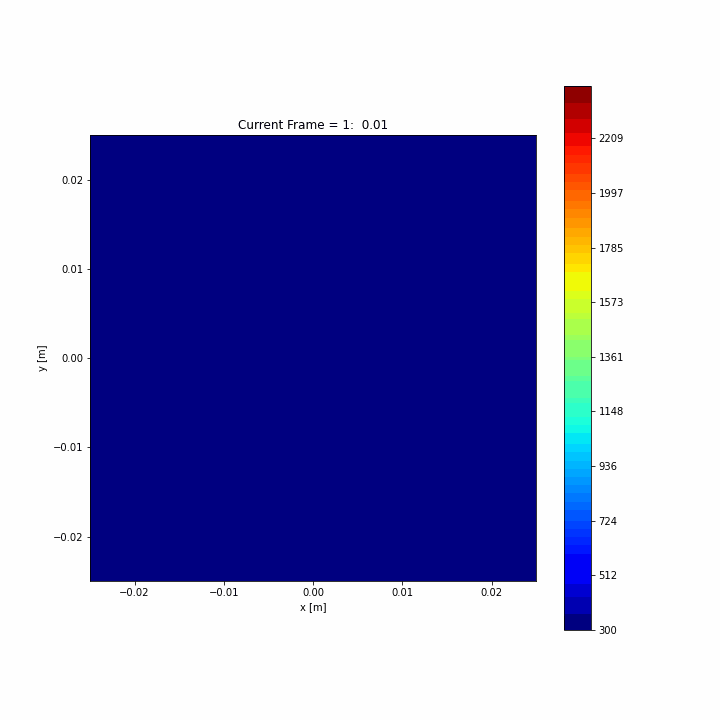

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import cm
from IPython import display
#################################################################################
# Input parameters:

# Plate Initialization:
x_length = 50/1000;               # [mm]-->[m]
y_length = 50/1000;               # [mm]-->[m]
nx = 200;                         # number of grid points
ny = 200;                         # number of grid points

# Plate Properties: Sample Material: AISI Type 316L Stainless Steel
T0 = 300; 			              # Initial ambient temperature [K]
k = 15; 			              # conductivity coefficient [W/m/K]
cp = .5*1000; 			          # specific heat [J/g/c]-->[J/kg/K]
rho = 8*1000; 		              # density [g/cc]-->[kg/m^3]

# Laser Initialization:
q = 300; 			              # laser power [W]
L_Rad = .7/1000;                  # Radius of the laser beam [mm] --> [m]
HSP =[.4*x_length,.4*x_length];   # Initial position of laser from plate center (x,y) [m]
vx = -20/1000; 	                  # laser speed x [m/s] (from [mm/sec])
vy = -20/1000; 	                  # laser speed y [m/s]

# Simulation Options: 
Max_Time = 3;                     # Time simulated [s]
Data_points = 400;                # amount of data sets collected
Frames_Used = 100;                # Frames seen (Should evenly devide Data points)
Temp_Definition  = 200;           # Levels of temperature displayed on figure

file_name = 'test.gif'

#################################################################################

print('Initializing Variables...')
[x,y] = np.meshgrid(np.linspace(-x_length/2,x_length/2,nx),np.linspace(-y_length/2,y_length/2,ny)); # [m]

dt = Max_Time/Data_points;                       # initialize values needed for calculations
alpha = k/(rho*cp);                              # dt = change in time per step
x_area = (x_length/nx)**2                        # alpha is the thermal diffusivity (m^2/s)
y_area = (y_length/ny)**2                        # the area of heat flow is represented by x_area or y_area

Time = np.linspace(0,Max_Time,Data_points);      # initialize the arrays used for data storage
T_diff =np.zeros((nx-1,ny-1));                   # T_diff stores the temperature distribution after diffusion      
T = T0*np.ones((nx,ny));                         # T stores the Temperature distribution after the laser heat gen.
Trial_Temps = list();                            # Trial_Temps stores temperature distributions from all trials

print('Starting Calculations...')
for t in range(np.size(Time)):
  T_pre = T;
  Trial_Temps.append(np.copy(T))  # store the previous temperature distribution
    
  for i in range(1,ny-1,1): # diffusion
    for j in range(1,nx-1,1):
       T_diff[i][j]= (1/(1+2*alpha*dt*((1/x_area)+(1/y_area))))*(T_pre[i][j]+(alpha*dt)*(((T[i-1][j]+T[i+1][j])/x_area)+((T[i][j-1]+T[i][j+1])/y_area)));
            
  for i in range(1,ny-1,1): # heat generated by the laser
    for j in range(1,nx-1,1):
      q_dt = q*dt; #Laser strength [J]
      Denom_Out = 2*np.pi*rho*cp*((4*np.pi*alpha*dt)**(1/2))*(2*alpha*dt+L_Rad**2);
      Num_xy = ((x[i][j]-HSP[0])**2)+((y[i][j]-HSP[1])**2);
      Denom_xy = 4*alpha*dt + 2*(L_Rad**2);
      T[i][j] = T_diff[i][j] + ((q_dt)/Denom_Out)*np.exp(-(Num_xy/Denom_xy)); #calcs the temp at point i,j
  
  HSP[0] = HSP[0]+vx*dt; #update the laser position
  HSP[1] = HSP[1]+vy*dt;

  if t == int(Data_points/2):
      print('Half of Needed Calculations Completed...')
T_Max = np.max(np.max(Trial_Temps));
print('Calculations Completed...')

#################################################################################

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = plt.axes(xlim=(-x_length/2, x_length/2), ylim=(-y_length/2, y_length/2),xlabel='x [m]',ylabel='y [m]')
ax.set_aspect('equal', 'box')
cvals = np.linspace(T0,T_Max,Temp_Definition)     # set contour values 
cont = plt.contourf(x, y, Trial_Temps[0], cvals,cmap = cm.jet)    # first image on screen
plt.colorbar(cont,label = 'Temperature [k]', orientation="vertical"))

n = int(Data_points/Frames_Used);

# animation function
def animate(dp):        # the function required for animation creation
    global cont,n
    T_Array = Trial_Temps[dp*n] # retrieve the saved data
    for c in cont.collections:
        c.remove()  # removes only the contours, leaves the rest intact
    cont = plt.contourf(x, y, T_Array, cvals,cmap = cm.jet)
    plt.title('Current Frame = %i:  %.2f' % (dp+1,Time[int((n*dp)+1)]))
    return cont

print('Animation Being Saved...')
anim = animation.FuncAnimation(fig,animate,frames=Frames_Used,cache_frame_data = False); # makes the animation
writergif = animation.PillowWriter(n); # creates a gif writter
print('Making Frames...')
anim.save(file_name,writer=writergif); # saves the gif
print('Animation Saved in Present Working Directory With Name - ', file_name)
plt.close()
display.Image(file_name) # displays the gif